In [212]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D
import matplotlib.image as mpimg

Membuat Direction untuk digunakan

In [213]:
data_suit_path = 'Dataset/Suit/Data_suit/Data_suit'


In [214]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                vertical_flip=True,
                shear_range = 0.2,
                width_shift_range =0.1,
                height_shift_range =0.1,
                zoom_range=0.3,
                validation_split=0.3,
                fill_mode = 'nearest'
            )


In [215]:
train_gene = datagen.flow_from_directory(
    data_suit_path,
    target_size=(100,150),
    classes=['paper','rock','scissors'],
    class_mode='categorical',
    subset='training'
)

vali_gene = datagen.flow_from_directory(
    data_suit_path,
    target_size=(100,150),
    classes=['paper','rock','scissors'],
    class_mode='categorical',
    subset='validation'
)

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [216]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [217]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 15, 512)       

In [218]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [219]:
model.fit(
      train_gene,
      steps_per_epoch=25, 
      epochs=15, 
      validation_data=vali_gene,  
      verbose=2)

Epoch 1/15
25/25 - 13s - loss: 1.1008 - accuracy: 0.4040 - val_loss: 0.9657 - val_accuracy: 0.5725
Epoch 2/15
25/25 - 11s - loss: 0.7756 - accuracy: 0.6550 - val_loss: 0.4947 - val_accuracy: 0.8183
Epoch 3/15
25/25 - 11s - loss: 0.4041 - accuracy: 0.8331 - val_loss: 0.4394 - val_accuracy: 0.8534
Epoch 4/15
25/25 - 11s - loss: 0.4685 - accuracy: 0.8356 - val_loss: 0.3298 - val_accuracy: 0.8824
Epoch 5/15
25/25 - 11s - loss: 0.3915 - accuracy: 0.8600 - val_loss: 0.4762 - val_accuracy: 0.8214
Epoch 6/15
25/25 - 11s - loss: 0.4020 - accuracy: 0.8525 - val_loss: 0.3627 - val_accuracy: 0.8733
Epoch 7/15
25/25 - 11s - loss: 0.3321 - accuracy: 0.8788 - val_loss: 0.2936 - val_accuracy: 0.9130
Epoch 8/15
25/25 - 11s - loss: 0.3105 - accuracy: 0.8934 - val_loss: 0.3189 - val_accuracy: 0.8931
Epoch 9/15
25/25 - 11s - loss: 0.3295 - accuracy: 0.8846 - val_loss: 0.3596 - val_accuracy: 0.8748
Epoch 10/15
25/25 - 11s - loss: 0.3555 - accuracy: 0.8700 - val_loss: 0.3060 - val_accuracy: 0.8916
Epoch 11/

In [220]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(200, 300, 3)


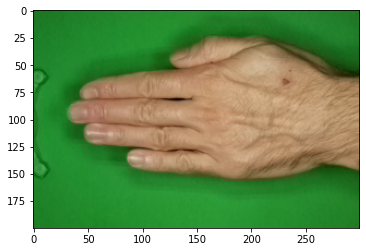

In [221]:
show_image('Dataset/Suit/Data_suit/paper/0a3UtNzl5Ll3sq8K.png')

In [236]:
# Membuat Image menjadi array
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(100, 150))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,100,150,3)
    # Preprocess image to align with original ImageNet dataset
    # image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [249]:
paper = load_and_process_image('Dataset/Suit/Data_suit/Data_suit/paper/0a3UtNzl5Ll3sq8K.png')
rock = load_and_process_image('Dataset/Suit/Data_suit/Data_suit/paper/0Og76sl5CJhbxWWx.png')
scissors = load_and_process_image('Dataset/Suit/Data_suit/Data_suit/scissors/0CSaM2vL2cWX6Cay.png')

Original image shape:  (200, 300, 3)
Processed image shape:  (1, 100, 150, 3)
Original image shape:  (200, 300, 3)
Processed image shape:  (1, 100, 150, 3)
Original image shape:  (200, 300, 3)
Processed image shape:  (1, 100, 150, 3)


In [253]:
model.predict(paper)


array([[1., 0., 0.]], dtype=float32)

In [254]:
model.predict(rock)

array([[1., 0., 0.]], dtype=float32)

In [255]:
model.predict(scissors)

array([[0., 0., 1.]], dtype=float32)

In [259]:
def show_img_predict(img_path):
    image = img = mpimg.imread(img_path)
    image = image_utils.load_img(img_path, target_size=(100, 150))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,100,150,3)
    result = np.argmax(model.predict(image))
    if result == 0 :
        print('This Image is Paper')
    elif result == 1 :
        print('This Image is Rock')
    elif result == 2 :
        print('This Image is Scissor')
    plt.imshow(img)
    

This Image is Scissor


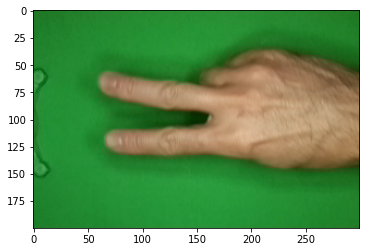

In [261]:
show_img_predict('Dataset/Suit/Data_suit/scissors/1VRzspyXpQ6A2rKy.png')